# Exploratory Data Analysis (EDA) Insight for Cab Investment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

1. Cab_Data.csv – this file includes details of transaction for 2 cab companies

2. Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

3. Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

4. City.csv – this file contains list of US cities, their population and number of cab users

### Research Questions

1. Which cab company is the most patronized among the two companies?

2. Which cab company is widely used across all city of the country?

3. What is the yearly revenue of each cab company?

4. 

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### Gathering Data

In [2]:
# load data
cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
customer_df = pd.read_csv("Customer_ID.csv")
transaction_df = pd.read_csv("Transaction_ID.csv")

### Accessing Data

#### Access Cab Dataset

In [3]:
# explore cab dataset
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
# check cab data info
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
# check sum of missing values in cab dataset
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
# check number of duplicate values
cab_df.duplicated().sum()

0

In [7]:
# check number of unique values in each column of the cab dataset
cab_df.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [8]:
# check value counts in city column
cab_df.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

##### Summary of cab data accessment 
1. no missing value in the dataset
2. no duplicate value in the dataset
3. the Date of Travel column is in string instead of datatime
4. City and Company should be categorical not string

#### Access City Dataset

In [9]:
# explore the city dataset
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [10]:
# check city data info
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


##### Summary of city data accessment 
1. comma within the numbers in Population and Users columns
2. Population and Users columns should be in int instead of string
3. City column should be categorical not string

#### Access Customer Dataset

In [11]:
# explore the city dataset
customer_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [12]:
# check customer data info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
# check number of unique values in customer data
customer_df.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

In [14]:
# check number of duplicates in customer data
customer_df.duplicated().sum()

0

In [15]:
# check missing values
customer_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [16]:
# check unique values in the Age column and sort in ascending order
np.sort(customer_df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

#### Summary of customer data accessment
1. no missing value
2. no duplicates
3. Gender should be categorical not string

#### Access Transaction Dataset

In [17]:
# explore the city dataset
transaction_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [18]:
# check the transaction data info
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [19]:
# ckeck the number of unique values
transaction_df.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [20]:
# check numbers of duplicates
transaction_df.duplicated().sum()

0

#### Summary of transaction data accessment
1. no missing value
2. no duplicates
3. Payment Mode should be categorical not string

### Cleaning Data

In [21]:
# merge the datasets
cab_master_df = cab_df.merge(transaction_df, on="Transaction ID") \
                .merge(customer_df, on="Customer ID") \
                .merge(city_df, on="City", how="left")
cab_master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [22]:
# check info of merged dataframe
cab_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


In [23]:
# make a copy for cleaning
cab_master_clean = cab_master_df.copy()
cab_master_clean.shape

(359392, 14)

In [24]:
# create profit per trip column
cab_master_clean['Profit per Trip'] = cab_master_clean['Price Charged'] - cab_master_clean['Cost of Trip']
cab_master_clean['Profit per Trip'].head()

0     57.3150
1    281.2772
2    194.6480
3     23.6660
4    253.9808
Name: Profit per Trip, dtype: float64

In [25]:
# remove "," from Population and Users columns and change datatypes from string to integer
columns = ["Population", "Users"]

for c in columns:
    cab_master_clean[c] = cab_master_clean[c].str.replace(",", "")
    cab_master_clean[c] = cab_master_clean[c].astype("int64")
    print(cab_master_clean[c].dtypes)
    
    
# check to confirm removal
cab_master_clean.head(1)

int64
int64


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit per Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315


In [26]:
# Change Date of Travel column to datetime
cab_master_clean["Date of Travel"] = pd.to_datetime(cab_master_clean["Date of Travel"], format="%d-%m-%Y")

# check changes
cab_master_clean["Date of Travel"].dtypes

dtype('<M8[ns]')

In [27]:
# convert columns with strings datatypes to category
columns = ["Company", "City", "Gender", "Payment_Mode"]

for c in columns:
    cab_master_clean[c] = cab_master_clean[c].astype("category")
    
# check datatypes
cab_master_clean.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
Profit per Trip              float64
dtype: object

In [28]:
# convert some columns with int datatypes to string
columns = ["Transaction ID", "Customer ID"]

for c in columns:
    cab_master_clean[c] = cab_master_clean[c].astype("str")
    
# check datatypes
cab_master_clean.dtypes

Transaction ID                object
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                   object
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
Profit per Trip              float64
dtype: object

In [29]:
# check decriptive statistics of the dataframe
cab_master_clean.describe()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users,Profit per Trip
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,12.233526,274.378911,157.993661,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,12.000000,206.437500,151.200000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,22.440000,386.360000,282.480000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,32.960000,583.660000,413.683200,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,48.000000,2048.030000,691.200000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


In [30]:
# check unique values in Profit per Trip
np.sort(cab_master_clean['Profit per Trip'].unique())

array([-220.06  , -198.698 , -176.9308, ..., 1433.342 , 1445.272 ,
       1463.966 ])

In [31]:
cab_master_clean[cab_master_clean['Profit per Trip'] < 0]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit per Trip
26,10246065,2017-10-29,Yellow Cab,AUSTIN TX,35.97,492.70,500.7024,33788,Cash,Male,23,23788,698371,14978,-8.0024
55,10033870,2016-05-18,Pink Cab,BOSTON MA,38.76,358.90,437.9880,58774,Card,Male,20,23602,248968,80021,-79.0880
65,10020665,2016-03-31,Yellow Cab,BOSTON MA,31.64,407.07,432.8352,58627,Card,Male,28,27338,248968,80021,-25.7652
78,10362532,2018-08-16,Yellow Cab,BOSTON MA,13.09,162.15,168.0756,58627,Card,Male,28,27338,248968,80021,-5.9256
83,10065021,2016-08-23,Yellow Cab,BOSTON MA,14.70,194.14,204.6240,59007,Card,Male,63,6683,248968,80021,-10.4840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359164,10432110,2018-12-23,Yellow Cab,SACRAMENTO CA,43.68,510.94,618.5088,46035,Cash,Male,27,18316,545776,7044,-107.5688
359165,10432113,2018-12-21,Yellow Cab,SACRAMENTO CA,15.30,198.66,216.6480,47592,Cash,Male,25,2719,545776,7044,-17.9880
359167,10432117,2018-12-22,Yellow Cab,SACRAMENTO CA,38.42,445.29,539.4168,45997,Cash,Male,45,18280,545776,7044,-94.1268
359170,10432622,2018-12-17,Yellow Cab,SEATTLE WA,18.72,258.00,269.5680,36110,Card,Female,18,4674,671238,25063,-11.5680


<a id='eda'></a>
## Exploratory Data Analysis

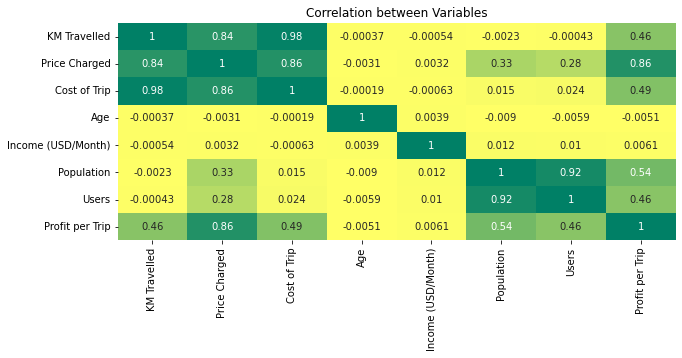

In [60]:
plt.figure(figsize=(10, 4))
sns.heatmap(cab_master_clean.corr(), cmap='summer_r', cbar=False, annot=True)
plt.title('Correlation between Variables');

In [61]:
cab_master_clean.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Profit per Trip'],
      dtype='object')

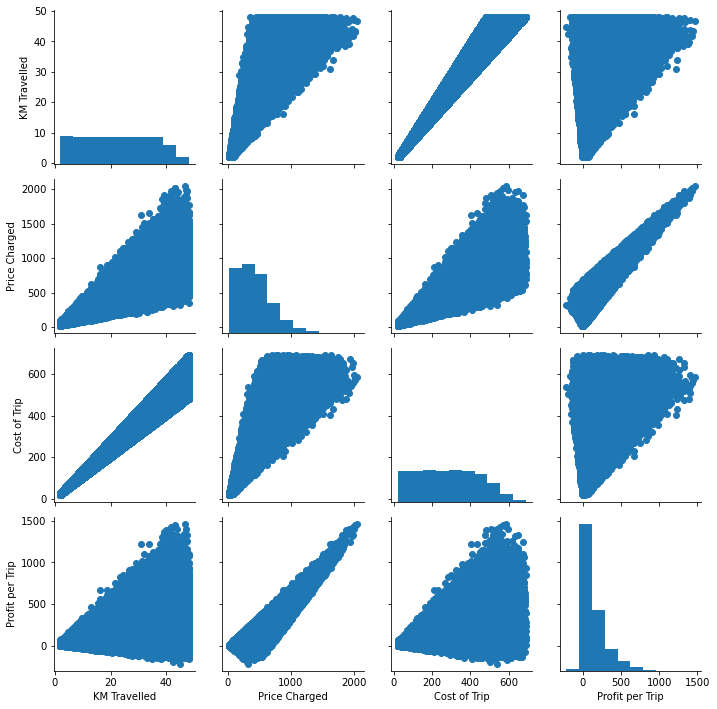

In [64]:
g = sns.PairGrid(
    data = cab_master_clean, 
    vars = ['KM Travelled','Price Charged', 'Cost of Trip', 'Profit per Trip'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

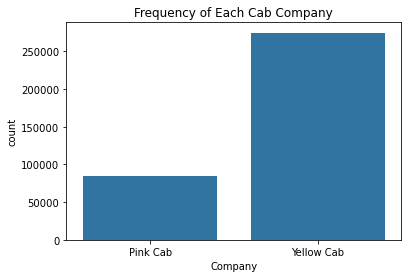

In [38]:
base_color = sns.color_palette()[0]

#plt.figure(figsize=(4, 4))
sns.countplot(data=cab_master_clean, x='Company', color=base_color)
plt.title('Frequency of Each Cab Company');

<a id='conclusions'></a>
## Conclusions